## Etapa 01 - Ler os dados


In [77]:
import pandas as pd
import sys
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st


"""importando as bibliotecas"""


'importando as bibliotecas'

## Etapa 02 - Prepare os dados

In [2]:
""""Essa linha de código serve para todas as funções que infelizmente não estão vindo de data_manipulation.py"""

def columns_format(df):
    """Função para formatar os nomes das colunas"""
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip()
    return df



def columns_convert(df, columns, type):
    """Função para alterar o tipo das colunas"""
    for column in columns:
        df[column] = df[column].astype(type)
    return df

def study_null_values(df, column):
    """Função para estudar os valores nulos"""
    return df[df[column].isnull()]


def total_sales_columns(df, columns):
    """Função para somar as vendas"""
    df['total_sales'] = df[columns].sum(axis=1)
    return df



In [3]:
df = pd.read_csv('../datasets/games.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()
"""Analisando os dados algumas colunas devem ser convertidas para o tipo correto
year_of_release para int
user_score para float

"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


'Analisando os dados algumas colunas devem ser convertidas para o tipo correto\nyear_of_release para int\nuser_score para float\n\n'

In [5]:

df = columns_format(df)

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [6]:
#estudando os dados nulos em year_of_release
study_null_values(df, 'year_of_release')

#como estamos obtendo dificuldades com os valores nulos dessa coluna para nao perdermos informações 
#podemos substituir por um valor numerico que nao gere distorções para a nossa analise.
#uma opção serie substituir pela media porem isso pode afetar nos filtros, portanto substituiremos 
#pelo valor 0

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
df['year_of_release'] = df['year_of_release'].fillna(0)

In [8]:
df = columns_convert(df, ['year_of_release'], int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [9]:
"""avaliando os valores nulos:
no caso de name faltam quase todos os dados, portanto apagaremos

perceba que também se trata dos dados nulos em genre
"""
study_null_values(df, 'name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df = df.dropna(subset=['name']).reset_index(drop=True)

In [11]:
study_null_values(df, 'user_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
"""nas colunas user_score e critic_score temos valores nulos, vamos substituir pela media, porem os valores tbd estao atrapalhando"""
df[df['user_score'] == 'tbd'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
717,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
725,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
820,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
880,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1046,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


In [13]:
""""como solução podemos trata-los como nulos e substituir pela media"""
df['user_score'] = df['user_score'].replace('tbd', None)

columns_convert(df, ['user_score'], float)


mean_user_score = df['user_score'].dropna().mean()

print(mean_user_score)

"""mas também vamos criar um df em paralelo que apenas apague os valores nulos, usado apenas em avaliações de rating"""
df_rating = df.dropna(subset=['user_score'])
df_rating = df_rating.dropna(subset=['critic_score'])


7.125046113306983


In [14]:
"""substituindo os valores nulos pela media"""
df['user_score'] = df['user_score'].fillna(mean_user_score)

In [15]:
"""Podemos fazer o mesmo para critic_score"""
mean_critic_score = df['critic_score'].dropna().mean()
print(mean_critic_score)
df['critic_score'] = df['critic_score'].fillna(mean_critic_score)

68.96767850559173


In [16]:

"""
é interessante notar que depois de trabalharmos com os valores nulos das colunas user_score e critic_score, 
percebemos que todos os valores nulos em rating seguem os valores das medias, vamos testar a teoria se são todos mesmos,
mas também é interessante notar que a coluna rating é uma coluna categorica, portanto não podemos substituir pela media
podemos optar entao, apesar de ser uma parcela significativa dos dados optar por criar um df sem esses valores nulos,
para usa-lo em analises que dependam de rating.
"""
study_null_values(df, 'rating')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68.967679,7.125046,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,68.967679,7.125046,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,68.967679,7.125046,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.967679,7.125046,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,68.967679,7.125046,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.967679,7.125046,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.967679,7.125046,NaN


In [17]:
df_null = df[df['rating'].isnull()]
print(f'o DataFrame com os valores nulos apenas em rating tem {df_null.shape[0]} linhas')

df_null = df_null[df_null['user_score']==mean_user_score]
df_null = df_null[df_null['critic_score']==mean_critic_score]

print(f'O DataFrame com valores nulos em rating, user_score e critic_score tem {df_null.shape[0]} linhas\n')

print(f'Ou seja cerca de {6665/6764*100}% das linhas com valores nulos em rating também tem valores nulos em user_score e critic_score\n')

df_rating = df_rating.dropna(subset=['rating']).reset_index(drop=True)
#agora df_rating é um dataframe sem os valores nulos em rating
#agora tiramos tb os valores nulos em user_score e critic_score, já esses valores tem o valor da media 



o DataFrame com os valores nulos apenas em rating tem 6764 linhas
O DataFrame com valores nulos em rating, user_score e critic_score tem 6665 linhas

Ou seja cerca de 98.53636901241869% das linhas com valores nulos em rating também tem valores nulos em user_score e critic_score



In [18]:
"""assim temos um dataframe sem valores nulos e um outro dataframe apenas para avaliações de rating"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [19]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6947 entries, 0 to 6946
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6947 non-null   object 
 1   platform         6947 non-null   object 
 2   year_of_release  6947 non-null   int32  
 3   genre            6947 non-null   object 
 4   na_sales         6947 non-null   float64
 5   eu_sales         6947 non-null   float64
 6   jp_sales         6947 non-null   float64
 7   other_sales      6947 non-null   float64
 8   critic_score     6947 non-null   float64
 9   user_score       6947 non-null   float64
 10  rating           6947 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 570.0+ KB


In [20]:
"""como ultima etapa para a preparação dos dados criaremos uma coluna com o total de vendas"""

total_sales_columns(df, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
total_sales_columns(df_rating, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])

df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,NaN,31.38


## Etapa 03 - Analise os dados

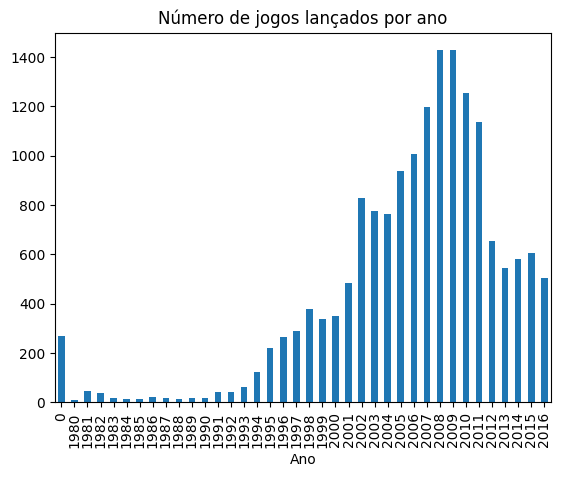

'Percebe-se pelo gráfico que houve um crescimento a partir de 1994, alto índice entre os anos de 2005 e 2011'

In [21]:
"""Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?"""

number_games_per_year = df['year_of_release'].value_counts().sort_index()

number_games_per_year.plot( kind='bar', 
                           title='Número de jogos lançados por ano',
                           xlabel='Ano')

plt.show()

"""Percebe-se pelo gráfico que houve um crescimento a partir de 1994, alto índice entre os anos de 2005 e 2011"""

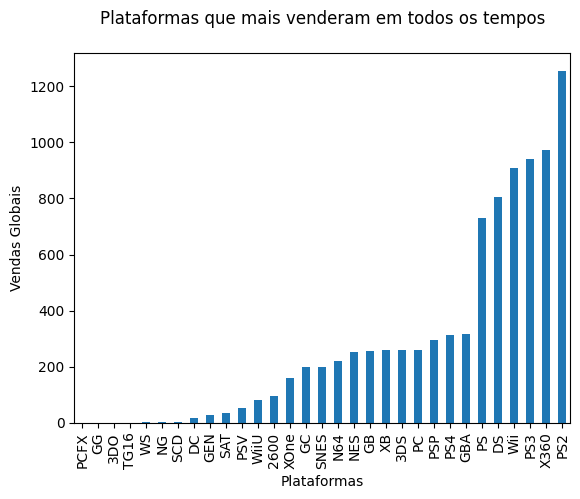

In [91]:
df.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar',
        xlabel='Plataformas',
        ylabel='Vendas Globais',
        title='Plataformas que mais venderam em todos os tempos\n')

plt.show()

Veja como as vendas variaram de plataforma para plataforma.(quais são as plataformas?) 

Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano.
(Calcule a quantidade de vendas por plataforma e escolha as que mais venderam)
(faça a distribuição por ano dessas plataformas)

Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. 
Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 31 plataformas no total.

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64 

As 5 plataformas com mais vendas são:
 ['PS2' 'X360' 'PS3' 'Wii' 'DS']


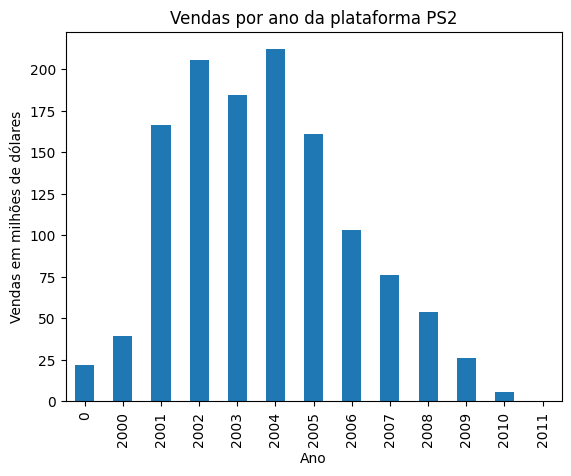

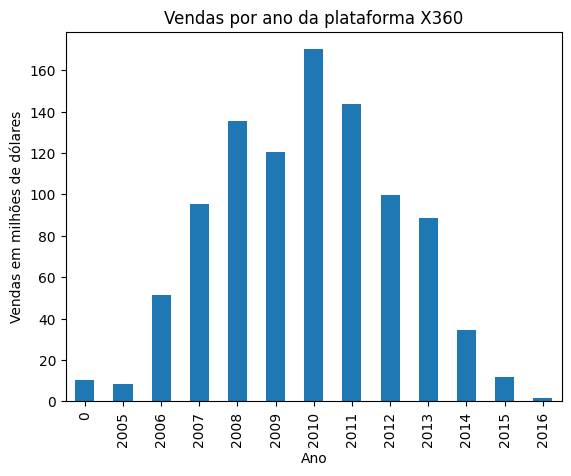

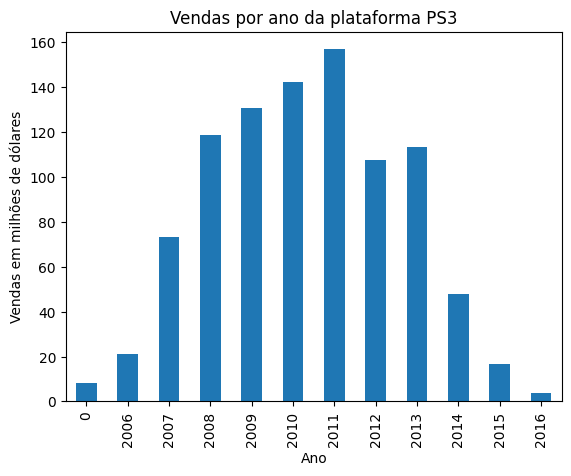

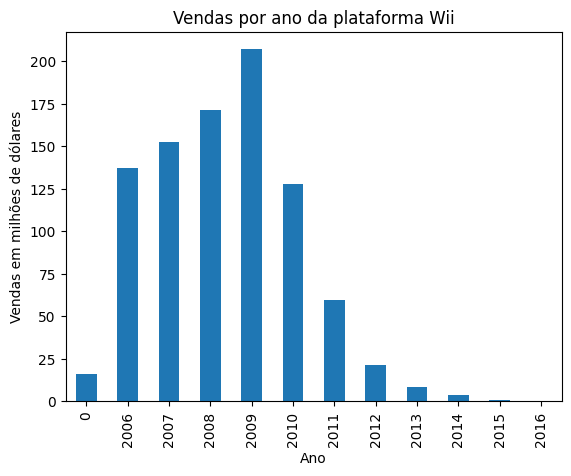

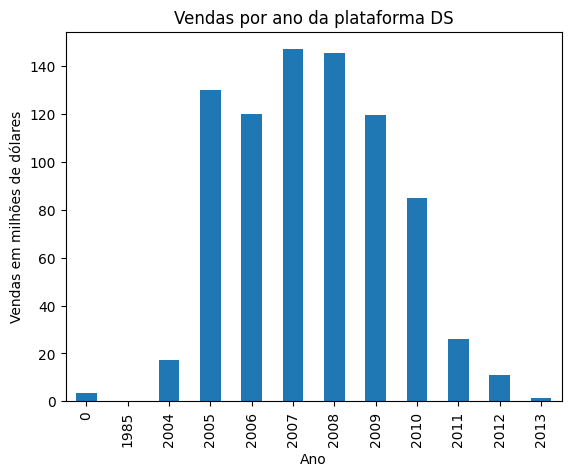

In [22]:
"""quais são as plataformas"""
platforms = df['platform'].unique()
print(platforms, len(platforms), f"plataformas no total.\n")

"""Calcule a quantidade de vendas por plataforma e escolha as que mais venderam"""
platforms_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

"""escolha as que mais venderam"""
print(platforms_sales.head(5), f'\n\nAs 5 plataformas com mais vendas são:\n', platforms_sales.head(5).index.values)


"""faça a distribuição por ano dessas plataformas"""
platforms_most_saled = platforms_sales.head(5).index.values
df_platforms = df[df['platform'].isin(platforms_most_saled)]
for platform in platforms_most_saled:
    df_platform = df_platforms[df_platforms['platform'] == platform]
    df_platform = df_platform.groupby('year_of_release')['total_sales'].sum()
    df_platform.plot(kind='bar', title=f'Vendas por ano da plataforma {platform}', xlabel='Ano', ylabel='Vendas em milhões de dólares')
    plt.show()



Com base nos dados podemos afirmar que leva cerca de 10 anos para uma plataforma desaparecer.

Como o cenário dos games muda muito em 10 anos vamos usar dados apenas dos ultimos 10 anos.

In [23]:
#filtrando apenas os jogos lançados nos ultimos 10 anos.
df_10 = df[df['year_of_release']>=2006].reset_index(drop=True)
df_10_rating = df_rating[df_rating['year_of_release']>=2006].reset_index(drop=True)

Quais plataformas estão liderando em vendas?
(contar quantas plataformas existem apenas nos ultimos 10 anos)
(somar as vendas por plataforma para filtragem)
Quais estão crescendo ou diminuindo? 
(graficos)
Selecione várias plataformas potencialmente lucrativas.

In [92]:
"""contar quantas plataformas existem apenas nos ultimos 10 anos"""
platforms_10 = df_10['platform'].unique()
print(platforms_10, len(platforms), f"plataformas que tiveram jogos novos nos ultimos anos.\n\n")
#percebemos que o numero de plataformas reduziu pela metade

"""Quais plataformas estão liderando em vendas?"""
platforms_sales_10 = df_10.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platforms_sales_10)


['Wii' 'DS' 'X360' 'PS3' 'PS4' '3DS' 'PC' 'XOne' 'WiiU' 'PS2' 'PSP' 'PSV'
 'GBA' 'GC' 'XB' 'DC'] 31 plataformas que tiveram jogos novos nos ultimos anos.


platform
X360    952.99
PS3     931.34
Wii     891.18
DS      655.35
PS4     314.14
PS2     265.80
3DS     257.81
PSP     238.63
PC      163.42
XOne    159.32
WiiU     82.19
PSV      53.81
GC       11.53
XB       10.77
GBA       8.68
DC        0.06
Name: total_sales, dtype: float64


É interessante notar que algumas dessas plataformas não serão mais relevantes nos proximos anos, para isso vamos criar os gráficos para mostrar a curvas de vendas dessas plataformas.

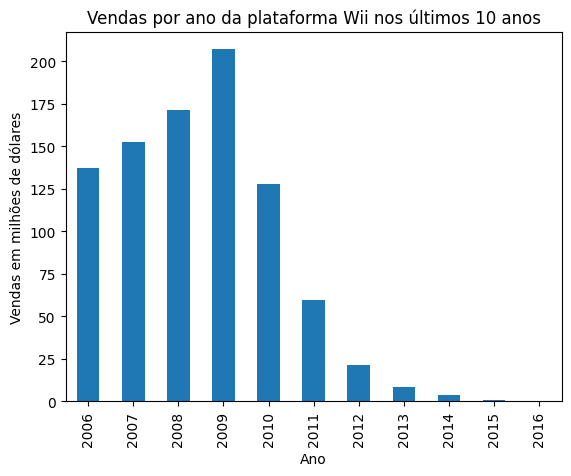

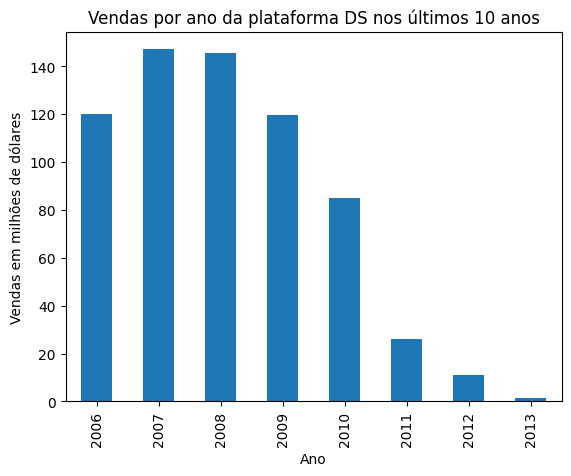

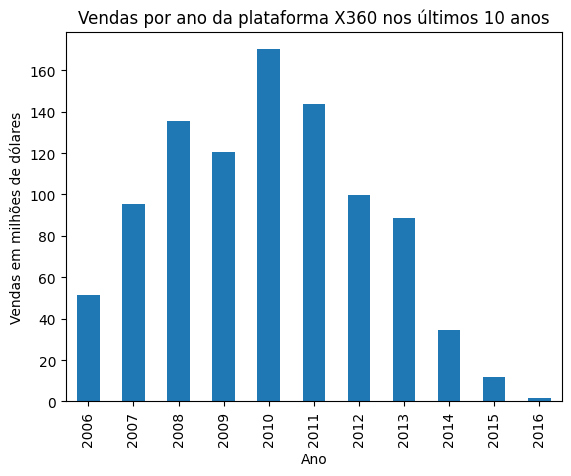

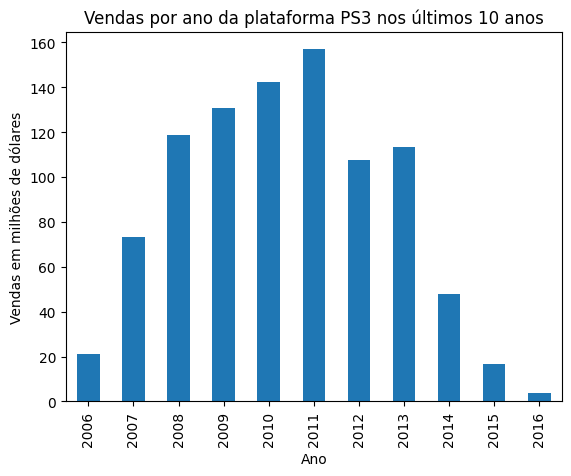

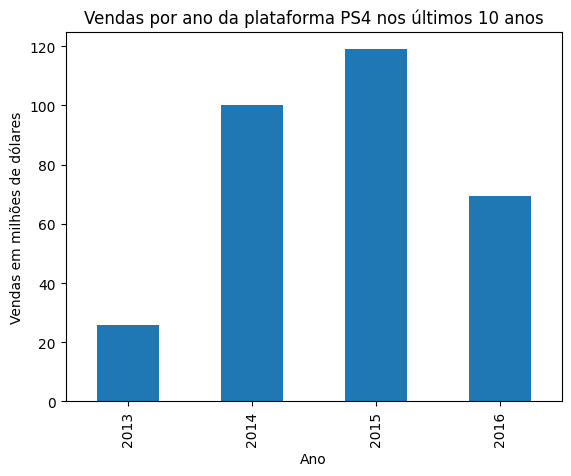

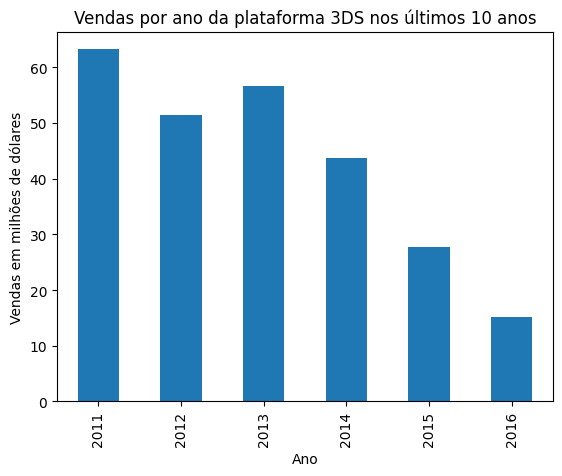

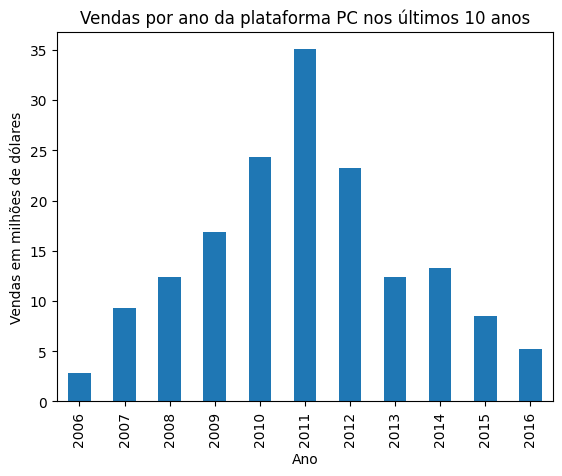

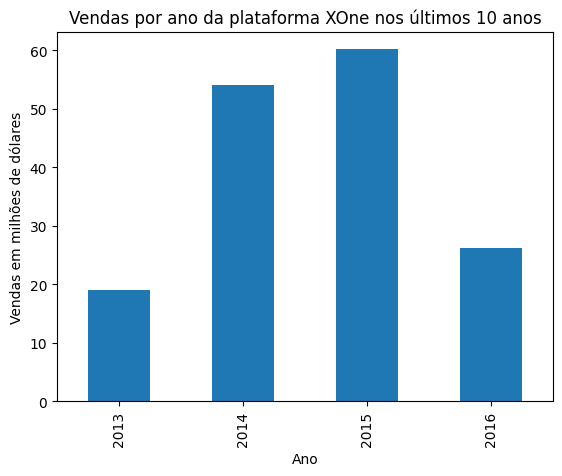

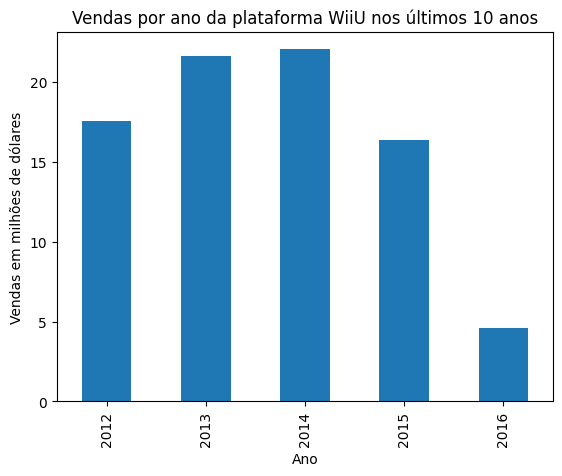

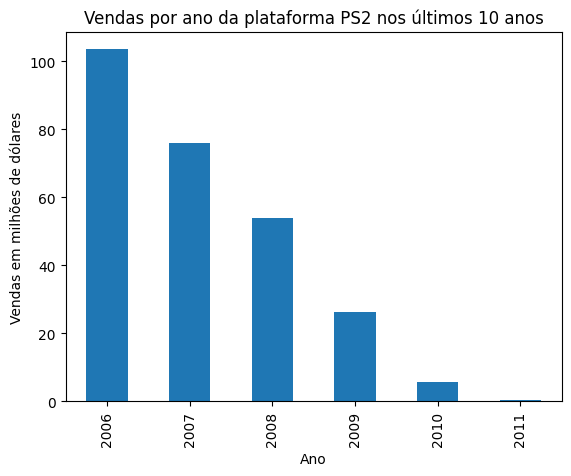

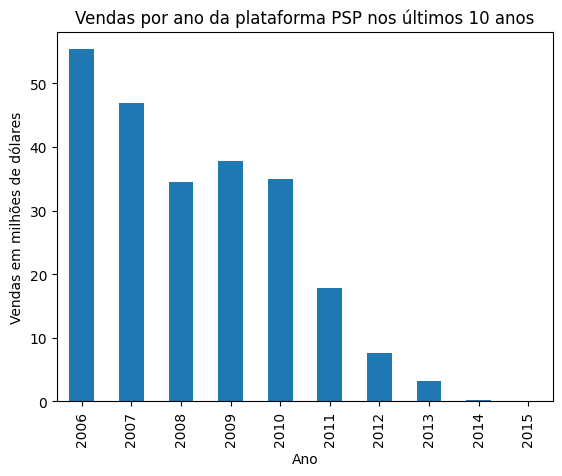

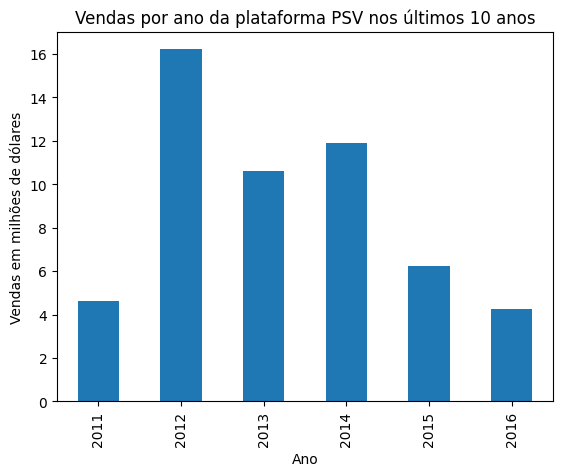

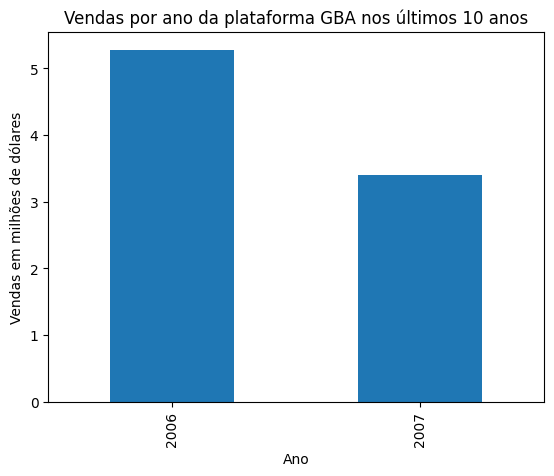

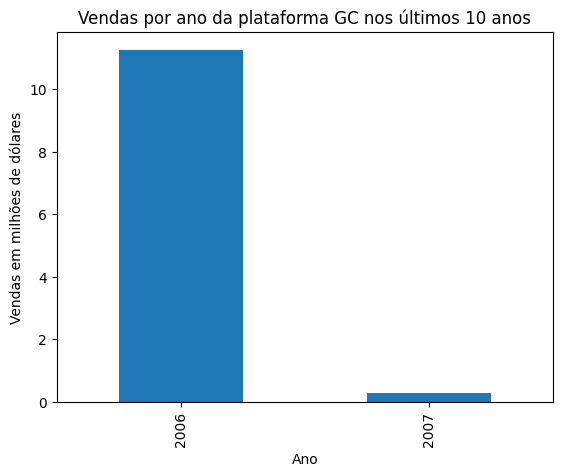

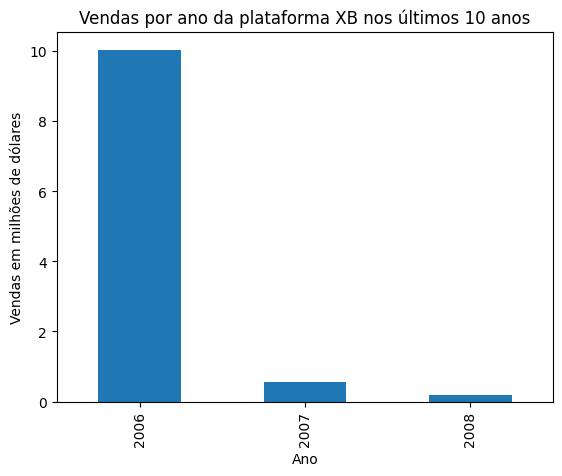

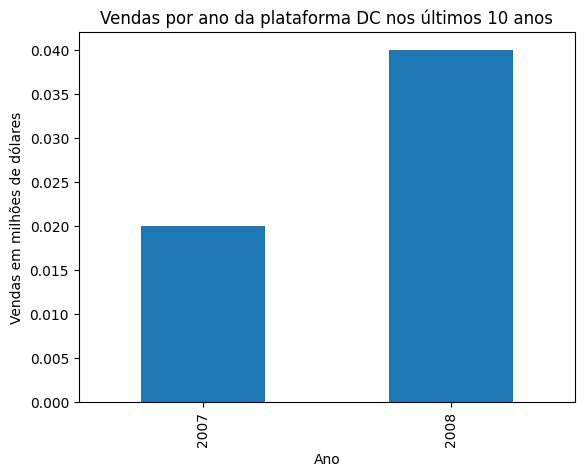

In [25]:
for platform in platforms_10:

    """esse ciclo for é para plotar os gráficos de vendas por ano de cada plataforma nos ultimos 10 anos"""
    df_platform = df_10[df_10['platform'] == platform]
    df_platform = df_platform.groupby('year_of_release')['total_sales'].sum()
    df_platform.plot(kind='bar', 
                title=f'Vendas por ano da plataforma {platform} nos últimos 10 anos', 
                xlabel='Ano', 
                ylabel='Vendas em milhões de dólares')
    plt.show()



Podemos filtrar ainda mais as plataformas potencialmente lucrativas.
Algumas plataformas nao produziram jogos novos nos ultimos anos.

In [26]:
filtered_platforms = df_10[df_10['year_of_release'] > 2013]
print(filtered_platforms['platform'].unique())


['PS4' '3DS' 'XOne' 'WiiU' 'PS3' 'X360' 'PC' 'Wii' 'PSV' 'PSP']


E algumas estão em tendência de queda nos ultimos anos, então podemos filtrar também aquelas plataformas que estão em decadência. É interessante notar também que os jogos lançados em 2016, estão a venda a menos de um ano, então existe uma queda em todos os gráficos, então podemos ignorar as vendas dos jogos lançados em 2016 na hora de avaliar tendência de alta ou baixa.

In [27]:
tendencia_de_alta = []
for platform in filtered_platforms['platform'].unique():

    """esse ciclo for serve para avaliar em quais plataformas existe tendencia de alta,
    par isso vamos avaliar se as vendas em 2014 foram menores que em 2015 em cada plataforma"""
    
    each_platform = filtered_platforms[filtered_platforms['platform'] == platform]
    year_2014 = each_platform[each_platform['year_of_release'] == 2014]['total_sales'].sum()
    year_2015 = each_platform[each_platform['year_of_release'] == 2015]['total_sales'].sum()

    if year_2014 < year_2015:
        tendencia_de_alta.append(platform)

filtered_platforms = filtered_platforms[filtered_platforms['platform'].isin(tendencia_de_alta)]
print(filtered_platforms['platform'].unique())

['PS4' 'XOne']


Portanto as unicas plataformas que estão em tendência de alta são o PS4 e o XOne.


Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

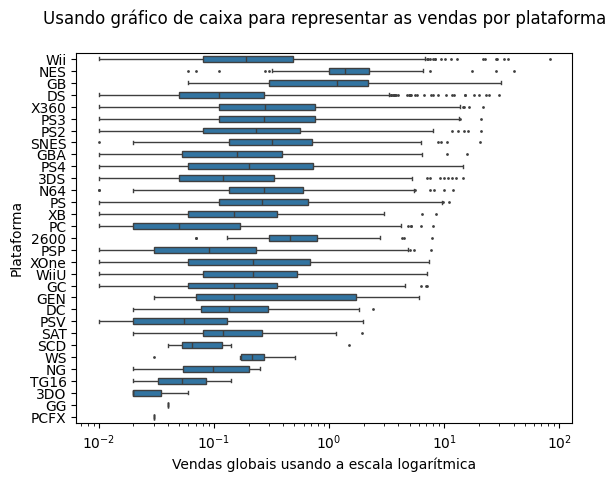

In [28]:

sns.boxplot(data=df, x='total_sales', y='platform', width=0.5, fliersize=1, log_scale=True)
plt.title("Usando gráfico de caixa para representar as vendas por plataforma\n")
plt.xlabel("Vendas globais usando a escala logarítmica")
plt.ylabel('Plataforma')
plt.show()


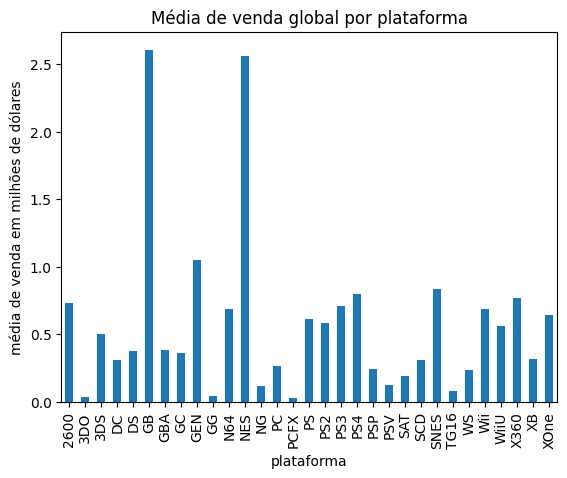

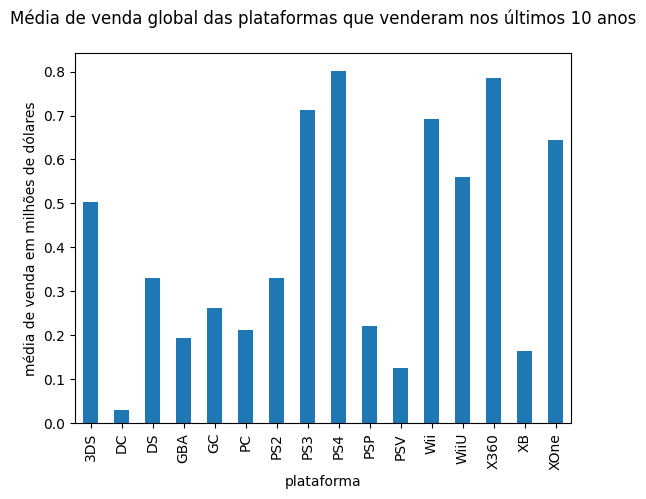

In [29]:
df.groupby('platform')['total_sales'].mean().plot(kind='bar', 
                                                    xlabel='plataforma',
                                                    ylabel='média de venda em milhões de dólares', 
                                                    title='Média de venda global por plataforma')
plt.show()

df_10.groupby('platform')['total_sales'].mean().plot(kind='bar', 
                                                    xlabel='plataforma',
                                                    ylabel='média de venda em milhões de dólares', 
                                                    title='Média de venda global das plataformas que venderam nos últimos 10 anos\n')

plt.show()

Algumas plataformas tem médias de vendas muito baixas, são descartáveis
as plataformas em tendência de alta estão entre as plataformas com maiores medias de vendas nas plataformas que estão operando nos ultimos 10 anos.
No gráfico de caixa percebe-se que as plataformas que mais tem outliers são da Nintendo, como Wii, DS, 3DS.

Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.


Aqui usamos outra base de dados quando consideramos o rating. df_rating ou df_10_rating.

Vamos usar a plataforma do playstation 2 para avaliação

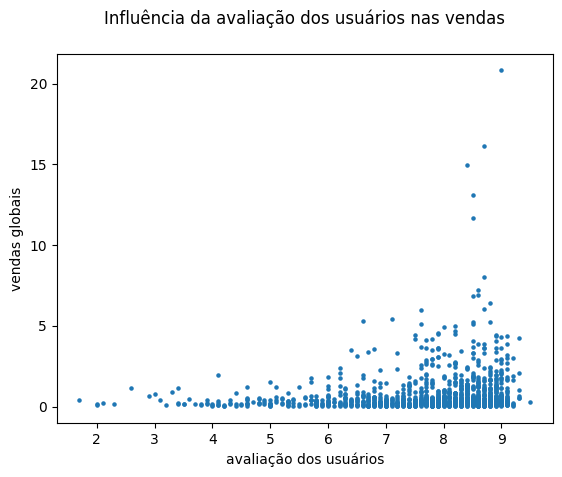

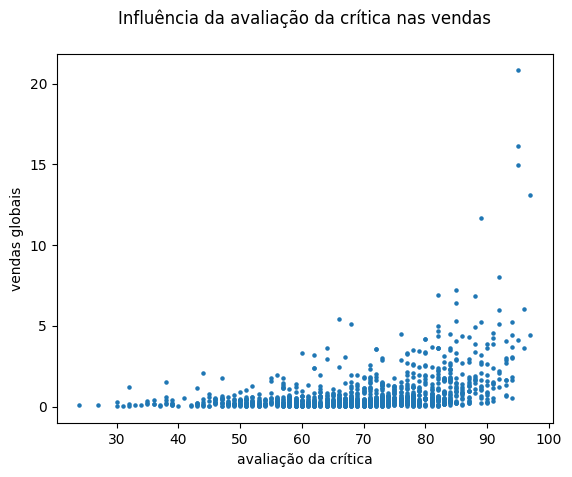

In [30]:
play_2 = df_rating[df_rating['platform']=='PS2']


play_2.plot(kind='scatter',
            x='user_score',
            y='total_sales',
            title='Influência da avaliação dos usuários nas vendas\n',
            xlabel='avaliação dos usuários',
            ylabel='vendas globais',
            s=5)

plt.show()

play_2.plot(kind='scatter',
            x='critic_score',
            y='total_sales',
            title='Influência da avaliação da crítica nas vendas\n',
            xlabel='avaliação da crítica',
            ylabel='vendas globais',
            s=5)
plt.show()


Jogos com boas avaliações podem até não necessáriamente vender bem, mas os jogos com mais de 5 milhões de vendas tiveram pelo menos 6 de nota dos usuários e 60 da crítica.

In [41]:
print(df_rating['total_sales'].corr(df_rating['critic_score']), "é a correlação entre vendas globais e avaliação da crítica")
print("essa correlação é fraca\n")
print(df_rating['total_sales'].corr(df_rating['user_score']), 'é a correlação entre vendas globais e avaliação dos usuários')
print("essa correlação também é fraca\n")




0.23740128070713834 é a correlação entre vendas globais e avaliação da crítica
essa correlação é fraca

0.08858510282367388 é a correlação entre vendas globais e avaliação dos usuários
essa correlação também é fraca



Isso se deve aos jogos bem avaliados que não foram bem em vendas, portanto a correlação entre tanto a avaliação da critica quanto dos usuários é fraca.

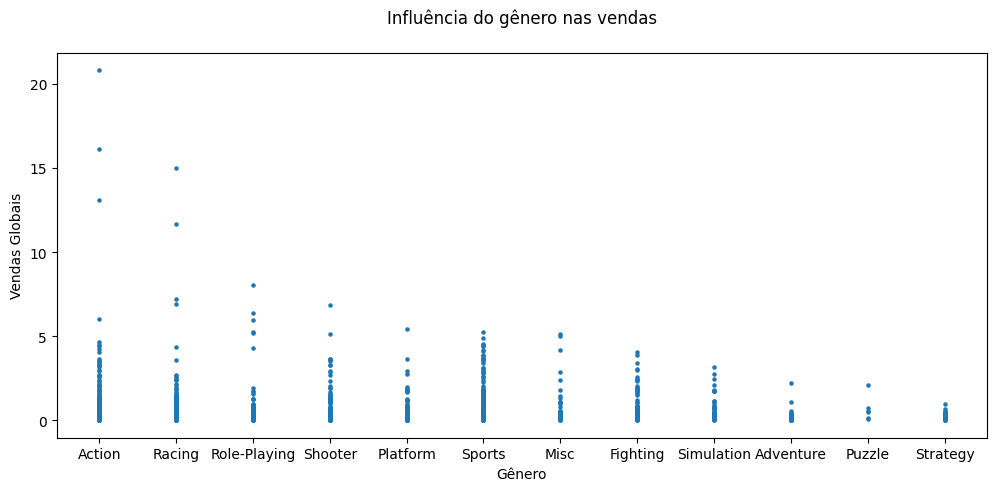

In [32]:
play_2.plot(kind='scatter',
            x='genre',
            y='total_sales',
            title='Influência do gênero nas vendas\n',
            xlabel='Gênero',
            ylabel='Vendas Globais',
            s=5,
            figsize=(12,5))



plt.show()

Percebemos que os jogos de ação e corrida tem jogos com os maiores numeros de vendas.

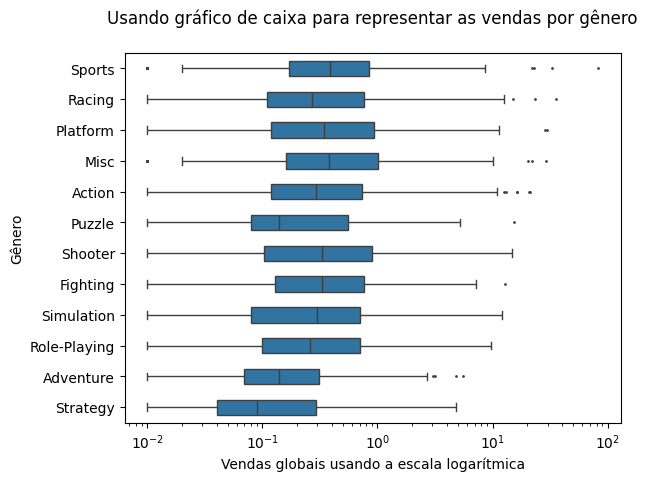

In [33]:
sns.boxplot(data=df_rating, x='total_sales', y='genre', width=0.5, fliersize=1, log_scale=True)
plt.title("Usando gráfico de caixa para representar as vendas por gênero\n")
plt.xlabel("Vendas globais usando a escala logarítmica")
plt.ylabel('Gênero')


plt.show()

Podemos observar que dentre os jogo mais vendidos, existem jogos de corridas, mas estes nao está entre os jogo com maiores medianas.
Os jogos com as maiores mediana são: Sports, Misc e Platform



In [34]:
df_rating.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Sports          0.39
Misc            0.38
Platform        0.34
Fighting        0.33
Shooter         0.33
Simulation      0.30
Action          0.29
Racing          0.27
Role-Playing    0.26
Adventure       0.14
Puzzle          0.14
Strategy        0.09
Name: total_sales, dtype: float64

In [35]:
df_rating.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          1223.60
Sports           850.35
Shooter          823.66
Role-Playing     503.56
Racing           479.87
Misc             424.51
Platform         378.63
Fighting         250.90
Simulation       203.51
Adventure         80.81
Puzzle            79.22
Strategy          70.81
Name: total_sales, dtype: float64

Os gêneros mais lucrativos no entanto são ação, esportes e jogos de tiro.

## ETAPA 04 - Criando um perfil para cada região

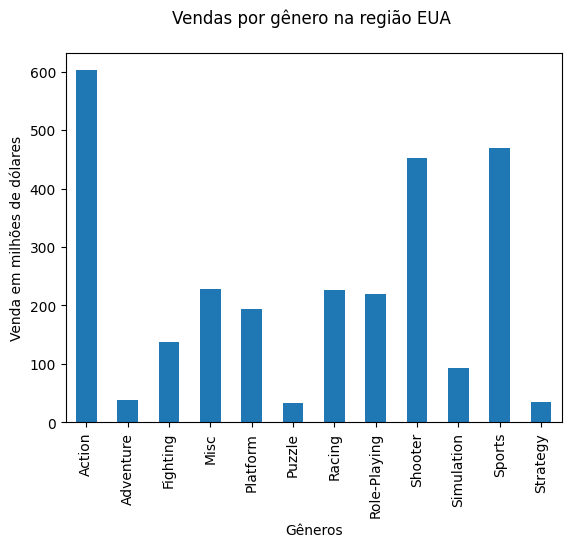

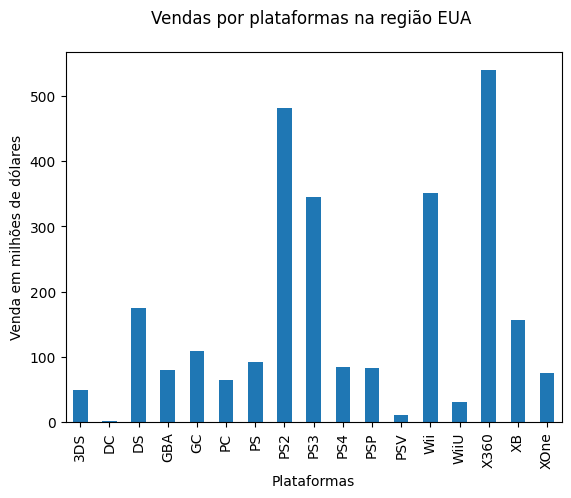

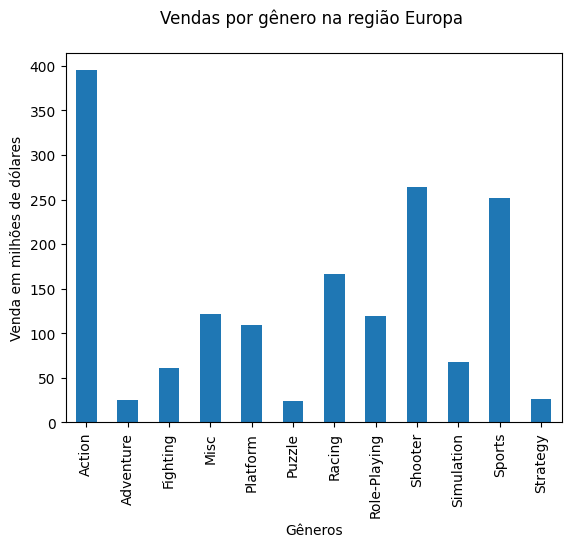

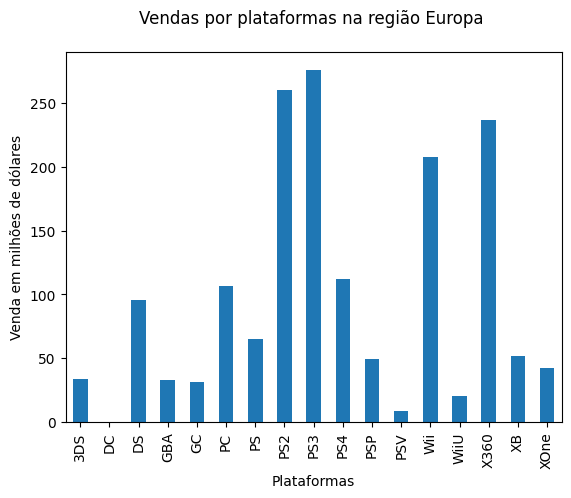

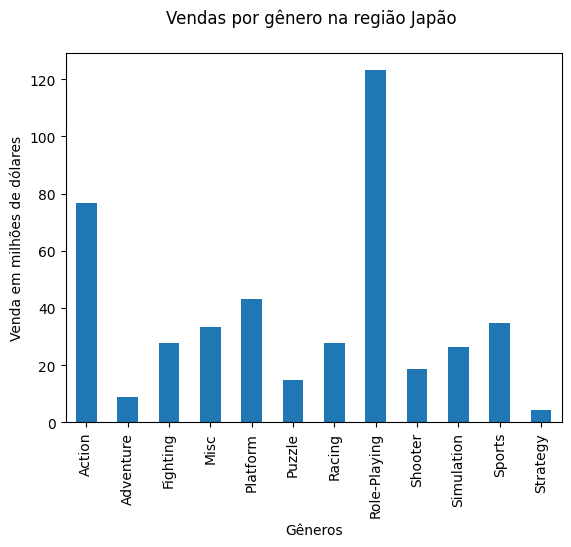

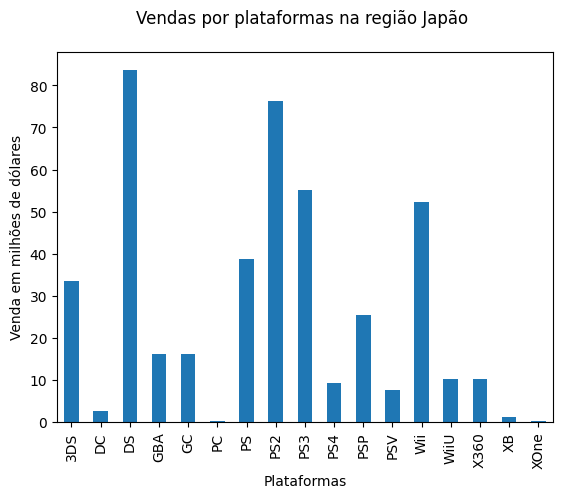

In [63]:
""" """
regions = ['na_sales', 'eu_sales', 'jp_sales']

def region_sales(df, region):

    """função que gera grafico de vendas totais por gênero e por plataforma na região escolhida"""

    if region == 'na_sales':
        regiao = 'EUA'
    elif region == 'eu_sales':
        regiao = 'Europa'
    else:
        regiao = 'Japão'
    df.groupby('genre')[region].sum().plot(kind='bar', 
                                                        xlabel='Gêneros',
                                                        ylabel='Venda em milhões de dólares', 
                                                        title=f'Vendas por gênero na região {regiao} \n')
    plt.show()


    df.groupby('platform')[region].sum().plot(kind='bar', 
                                                        xlabel='Plataformas',
                                                        ylabel='Venda em milhões de dólares', 
                                                        title=f'Vendas por plataformas na região {regiao} \n')
    plt.show()

for region in regions:
    region_sales(df_rating, region)



Com esses gráficos é possível observar a heterogenidade das regiões:

In [68]:
for region in regions:

    if region == 'na_sales':
        regiao = 'norte-americana'

    elif region == 'eu_sales':
        regiao = 'europeia'
    else:
        regiao = 'japonesa'

    print(f'\nOs gêneros mais vendidos na região {regiao}\n\n', df.groupby('genre')[region].sum().sort_values(ascending=False).head(5).reset_index())


Os gêneros mais vendidos na região norte-americana

       genre  na_sales
0    Action    879.01
1    Sports    684.43
2   Shooter    592.24
3  Platform    445.50
4      Misc    407.27

Os gêneros mais vendidos na região europeia

      genre  eu_sales
0   Action    519.13
1   Sports    376.79
2  Shooter    317.34
3   Racing    236.51
4     Misc    212.74

Os gêneros mais vendidos na região japonesa

           genre  jp_sales
0  Role-Playing    355.41
1        Action    161.43
2        Sports    135.54
3      Platform    130.83
4          Misc    108.11


In [67]:
for region in regions:

    if region == 'na_sales':
        regiao = 'norte-americana'

    elif region == 'eu_sales':
        regiao = 'europeia'
    else:
        regiao = 'japonesa'

    print(f'\nAs plataformas mais vendidas na região {regiao}\n\n', df.groupby('platform')[region].sum().sort_values(ascending=False).head(5).reset_index())


As plataformas mais vendidas na região norte-americana

   platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40

As plataformas mais vendidas na região europeia

   platform  eu_sales
0      PS2    339.29
1      PS3    330.29
2     X360    270.76
3      Wii    262.21
4       PS    213.61

As plataformas mais vendidas na região japonesa

   platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      3DS    100.67


Analisando a classificação ESRB:


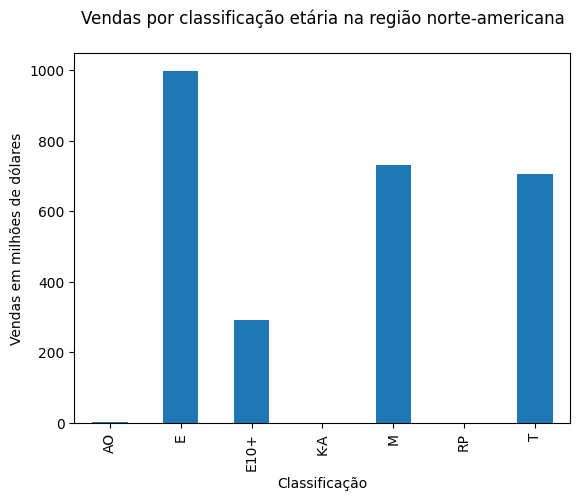

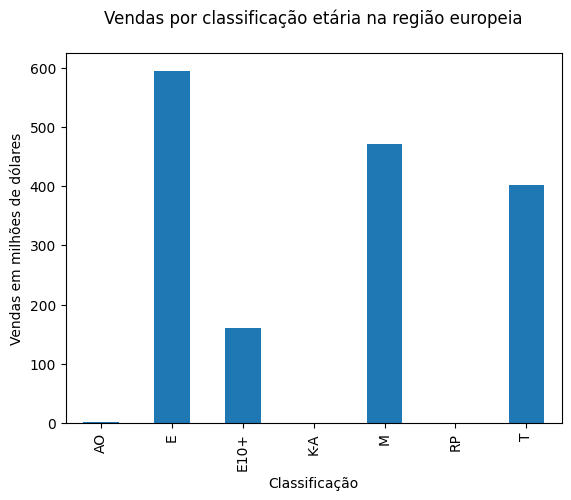

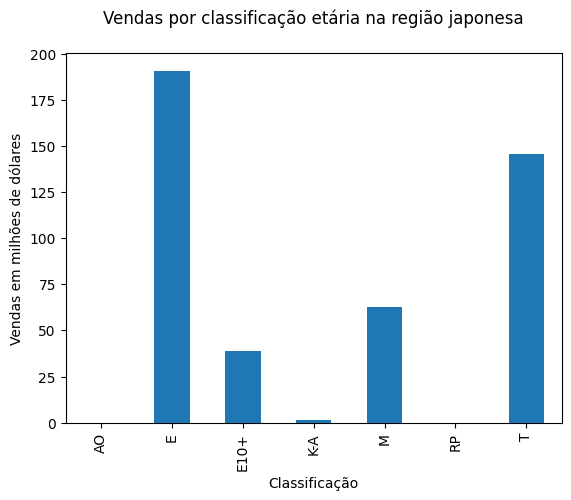

In [76]:
for region in regions:

    if region == 'na_sales':
        regiao = 'norte-americana'

    elif region == 'eu_sales':
        regiao = 'europeia'
    else:
        regiao = 'japonesa'

    

    df_rating.groupby('rating')[region].sum().plot(kind='bar',
                                                        xlabel='Classificação',
                                                        ylabel='Vendas em milhões de dólares',
                                                        title=f'Vendas por classificação etária na região {regiao}\n')
    plt.show()

O mercado americano e europeu nesse caso se comportam de forma parecida: E > M > T.
Porem o mercado japones tem vendas para plataforma M bem mais baixo proporcionalmente.

## Etapa 5. Teste das hipóteses

In [79]:
#hipotese 0: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
print('Testando a hipótese nula que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas')

media_x_one = df_rating[df_rating['platform']=='XOne']['user_score']
media_pc = df_rating[df_rating['platform']=='PC']['user_score']
alpha = 0.05 #nivel de significancia

#teste da hipotese nula
results = st.ttest_ind(media_x_one, media_pc, equal_var=False)

#valor p
print('\nvalor-p:', results.pvalue)

if results.pvalue < alpha:
    print('\nRejeitamos a hipótese nula')
else:
    print('\nNão podemos rejeitar a hipótese nula')


Testando a hipótese nula que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas

valor-p: 6.9814395630888125e-06

Rejeitamos a hipótese nula


In [81]:
#H0 = As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.
print("Testando a hipótese que as classificações medias de usuarios para os gêneros de ação e esportes são diferentes\n")
print("A hipotese nula é que elas são iguais\n")

media_action = df_rating[df_rating['genre']=='Action']['user_score']
media_sports = df_rating[df_rating['genre']=='Sports']['user_score']


#teste a hipótese nula
results = st.ttest_ind(media_action, media_sports, equal_var=False)

#valor p
print('valor-p:', results.pvalue)

if results.pvalue < alpha:
    print('\nRejeitamos a hipótese nula\nPortanto as classificações médias de usuários para os gêneros ação e esportes são diferentes\n')
else:
    print('\nNão podemos rejeitar a hipótese nula\nPortanto as classificações médias de usuários para os gêneros de ação e esportes são iguais\n')

Testando a hipótese que as classificações medias de usuarios para os gêneros de ação e esportes são diferentes

A hipotese nula é que elas são iguais

valor-p: 0.6314036358887649

Não podemos rejeitar a hipótese nula
Portanto as classificações médias de usuários para os gêneros de ação e esportes são iguais



## Etapa 06 - Conclusão

1. Do material original usa-se praticamente dois DataFrames. Essa necessidade surge por conta da quantidade alta de valores nulos nas seguintes colunas, avaliação da crítica, avaliação dos usuários, e avaliação indicativa. Portanto cria-se dois banco de dados, chamados de df e df_rating, onde o primeiro considera esses valores nulos e o segundo não. Quandos esses parametros forem importantes vamos usar o segundo banco de dados, do contrário o primeiro.

2. Na hora de analisar os dados chegou-se a algumas conclusões
    * Os dados de venda dos jogos lançados no ano de 2016 não podem ser usados para determinar tendências, já que os jogos estão sob oferta a apenas alguns meses, então dificilmente as vendas totais serao maiores que os anos anteriores
    * Percebe-se que leva em média 10 anos para uma plataforma sumir depois de seu início.
    * Entre os anos de 2011 e 2005, houve a época com mais lançamentos de jogos novos. O gráfico de venda desses 10 anos se comporta como um gráfico de curva normal.
    * As plataformas mais populares de todos os tempos não tem jogos novos sendo lançados mais, ou estão em tendência de queda de novos lançamentos, como o PS3 e o XBOX 360.
    * As unicas plataformas que tem tendência de alta nas vendas de novos lançamentos são o PS4 d XBOX ONE. Sâo as potêncialmente lucrativas.
    * Os gêneros esporte, tiro e ação são os de mais sucesso nas vendas.
    * As avaliações tanto de critica como jogadores tem uma correlação fraca com as vendas.

3. Na hora de avaliar as vendas conforme as regiões tiramos mais conclusões, o perfil de vendas europeu é muito parecido com o americano, porem o japones tem diferenças significativas:

    * Proporcionalmente o DS e o 3DS são mais populares no Japão, ambas são da japonesa Nintendo.
    * Jogos avaliados como M são proporcionalmente menos populares no Japão.
    * O gênero de RPG é proporcionalmente muito mais popular.

4. Avaliamos as seguintes hipóteses;
    * As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

    * As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

    Ambas são falsas.